In [1]:
# Make the following code support python2 and python3
from __future__ import division, print_function, unicode_literals

# Check if the version of python is 3.5 and above
import sys
assert sys.version_info >= (3, 5)

# Check to see if sklearn is version 0.20 and above
import sklearn
assert sklearn.__version__ >= "0.20"
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import os 
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.multioutput import RegressorChain
from sklearn.metrics import accuracy_score, r2_score, make_scorer, f1_score, recall_score, precision_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
import seaborn as sns
# The result obtained after each run is the same as that of this notebook
np.random.seed(42) 

# Make matplotlib diagrams work better
%matplotlib inline
import matplotlib as mpl
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)


In [2]:
# Ignoring Unnecessary Warnings
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [3]:
orig_data = pd.read_excel('CPXOPX_P.xlsx')#D:\坚果云\合作 Projects\秦奔 Project\Big data project\Geobarameter\cpxthermobarameter\P.xlsx')#Preprocessing\\REE微量\\删除重复标签
 #orig_data.dropna(inplace=True) #delete missing value
#orig_data C:\\Users\\lenovo\\Desktop\\Trainingset\\finaltrain\\MAJOR1-4.xlsx  ###D:\坚果云\合作 Projects\秦奔 Project\Big data project\Geobarameter\cpxthermobarameter\Pkmeans.xlsx

In [4]:
from sklearn.model_selection import StratifiedShuffleSplit

# Stratified sampling based on clustering results
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=2009)  #2009 6 9_OPX    20230915-6
for train_index, test_index in split.split(orig_data, orig_data["Label"]):
    strat_train_set = orig_data.loc[train_index]
    strat_test_set = orig_data.loc[test_index]

In [5]:
strat_train_set

,P,SiO2_Cpx,TiO2_Cpx,Al2O3_Cpx,Cr2O3_Cpx,FeOt_Cpx,MnO_Cpx,MgO_Cpx,CaO_Cpx,Na2O_Cpx,SiO2_Opx,TiO2_Opx,Al2O3_Opx,Cr2O3_Opx,FeOt_Opx,MnO_Opx,MgO_Opx,CaO_Opx,Na2O_Opx,Label
363,5.0,54.570000,NaN,1.770000,NaN,3.950000,NaN,23.340000,16.790000,0.021000,57.180000,NaN,0.170000,NaN,5.200000,NaN,36.280000,0.622000,0.02200,5
305,4.0,55.300000,0.410000,4.100000,1.100000,3.200000,0.10000,17.100000,15.700000,3.400000,56.800000,0.430000,1.800000,0.430000,4.800000,0.10000,35.600000,0.700000,0.24000,4
1,2.4,50.154650,0.454400,6.991100,0.832750,3.257350,0.10885,17.132350,18.708950,1.524700,48.947100,0.116700,3.846300,0.284900,0.341792,0.09640,37.201800,1.559200,0.12520,2
427,7.0,54.950000,0.130000,2.090000,0.650000,3.300000,0.08000,19.900000,16.460000,1.470000,57.650000,0.060000,0.720000,0.320000,4.280000,0.08000,33.970000,1.490000,0.28000,7
457,3.0,55.183040,0.215560,0.212120,0.548640,1.909640,NaN,18.332920,23.315600,0.646880,57.935520,0.132520,0.156120,0.307880,5.473720,NaN,34.582520,0.557440,0.16172,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,1.8,51.583750,0.528750,7.002500,0.745000,2.922500,0.08500,15.326250,19.305000,1.827500,53.910643,0.086571,4.055943,0.298382,6.348010,0.14295,33.631671,0.521270,0.00000,2
418,4.0,54.877466,0.162538,2.308703,0.752319,2.901801,NaN,18.151180,19.325434,1.261825,57.580567,0.000000,1.322061,0.459933,4.915077,NaN,34.959498,0.762863,0.00000,4
385,4.0,54.847991,0.189387,2.119534,0.774147,2.700791,NaN,18.717308,19.643341,0.927011,57.336991,0.000000,1.668018,0.467706,4.885889,NaN,34.686161,0.887915,0.00000,4
310,3.0,53.230000,NaN,3.740000,1.250000,NaN,NaN,20.180000,21.610000,NaN,56.830000,NaN,3.830000,0.860000,NaN,NaN,37.280000,1.190000,NaN,3


In [6]:
strat_test_set

,P,SiO2_Cpx,TiO2_Cpx,Al2O3_Cpx,Cr2O3_Cpx,FeOt_Cpx,MnO_Cpx,MgO_Cpx,CaO_Cpx,Na2O_Cpx,SiO2_Opx,TiO2_Opx,Al2O3_Opx,Cr2O3_Opx,FeOt_Opx,MnO_Opx,MgO_Opx,CaO_Opx,Na2O_Opx,Label
420,5.5,56.000000,0.000000,1.600000,0.900000,3.900000,0.130000,22.100000,14.400000,1.280000,57.600000,NaN,0.400000,0.300000,4.500000,0.11,35.900000,0.400000,0.100000,6
449,4.0,54.450000,NaN,4.420000,NaN,3.380000,NaN,23.010000,14.890000,0.065000,57.840000,NaN,0.590000,NaN,5.830000,NaN,35.480000,0.451000,0.018000,6
321,2.5,53.963576,0.348460,2.523674,0.668225,1.716435,NaN,18.269610,21.984924,0.434632,56.894544,0.183192,2.540544,0.247096,3.916612,NaN,35.360277,0.688744,0.000000,3
407,6.0,52.298162,0.127994,1.310072,1.119962,4.949981,0.105805,21.179621,17.082408,1.184656,57.483345,0.000000,0.497524,0.140659,7.167169,0.00,33.660960,1.004690,0.000000,6
217,2.0,52.589445,0.571638,4.299933,0.577962,1.651680,NaN,17.520962,22.279976,0.508404,56.114139,0.134695,3.808774,0.356425,3.870941,NaN,34.548356,0.874485,0.292186,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,3.2,54.100000,0.170000,1.260000,0.310000,2.430000,0.070000,18.940000,22.670000,0.060000,56.500000,0.110000,1.980000,0.360000,5.580000,0.10,34.720000,0.700000,0.003000,3
283,8.0,53.850000,0.090000,3.360000,0.510000,2.100000,0.080000,21.730000,15.840000,1.360000,56.680000,0.040000,0.740000,0.110000,2.580000,0.08,37.760000,NaN,NaN,8
167,4.0,54.320000,0.310000,2.440000,0.700000,3.970000,0.030000,17.920000,17.690000,1.770000,55.590000,0.360000,1.890000,0.440000,7.600000,0.16,30.920000,2.320000,0.260000,4
172,3.0,53.330000,0.250000,4.340000,1.050000,3.260000,0.090000,18.400000,17.490000,1.210000,55.610000,0.110000,3.250000,0.580000,5.900000,0.10,32.610000,1.210000,0.180000,3


In [7]:
strat_test_set["Label"].value_counts()

3     31
4     16
2     15
6     12
1     11
5      9
7      5
10     2
9      1
8      1
Name: Label, dtype: int64

In [8]:
# Separate features and labels
#c = orig_data['Mean_age']
X_train = strat_train_set.drop(['P','Label'], axis=1).copy()  #,'T'
y_train = strat_train_set[['P']]

X_test = strat_test_set.drop(['P','Label'], axis=1).copy()
y_test = strat_test_set[['P']]

In [9]:
X_test
X_test.to_excel('outputTEST.xlsx', sheet_name='Sheet1', index=False)

In [10]:
y_test

,P
420,5.5
449,4.0
321,2.5
407,6.0
217,2.0
...,...
261,3.2
283,8.0
167,4.0
172,3.0


In [11]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#X_train.shape, X_test.shape, y_train.shape, y_test.shape

In [12]:
#roc_auc_score = make_scorer(roc_auc_score, multi_class='ovo',needs_proba=True) #3 classes roc_auc
#f1_score = make_scorer(f1_score, multi_class='ovo',needs_proba=True)
#recall_score = make_scorer(recall_score, multi_class='ovo',needs_proba=True)
#precision_score = make_scorer(precision_score, multi_class='ovo',needs_proba=True)

In [13]:
from sklearn.metrics import mean_squared_error
xgb_clf = XGBRegressor(base_score = 0,
        booster ='gbtree',
        objective='reg:squarederror',
        colsample_bylevel = 1,
        colsample_bynode = 1,
        max_delta_step = 0,
        reg_alpha = 0.6,
        reg_lambda = 0.3,
        tree_method = 'exact',
        validate_parameters = 9,
        num_parallel_tree = 2,
        colsample_bytree = 0.8,
        eta = 0.1,    #0.1
        #silent: 
        subsample = 0.8,
        max_depth = 9,
        min_child_weight = 20,
        gamma = 0.5,
        n_estimators = 100,
        random_state = 10,) #objective='reg:squarederror' reg:logistic   MultiOutputRegressor RegressorChain alpha=1,gamma=3
xgb_clf.fit(X_train, y_train) 
y_pred_xgb = xgb_clf.predict(X_train)


Train_r2= np.around(r2_score(y_train, y_pred_xgb), decimals=3)
Train_rmse = np.around(mean_squared_error(y_train, y_pred_xgb), decimals=3)

print("Train_r2 =",Train_r2)
print("Train RMSE = ",Train_rmse)


Train_r2 = 0.969
Train RMSE =  0.125


In [14]:
from sklearn.model_selection import cross_val_score

# Ten-fold cross validation      neg_mean_absolute_error  neg_mean_absolute_error
scores = cross_val_score(xgb_clf, X_train, y_train,
                        scoring = "r2", cv=5,
                        n_jobs=-1)
def display_scores(scores):

    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
    
display_scores(scores)

Scores: [0.80989097 0.81002938 0.73417552 0.84085288 0.75063793]
Mean: 0.7891173370095694
Standard deviation: 0.040111575479126776


In [15]:
y_test_pred_xgb = xgb_clf.predict(X_test)


Test_r2= np.around(r2_score(y_test, y_test_pred_xgb), decimals=3)
Test_rmse = mean_squared_error(y_test, y_test_pred_xgb)

print("Test_r2 =",Test_r2)
print("Test RMSE = ",Test_rmse)

Test_r2 = 0.841
Test RMSE =  0.655871435408881


In [16]:
a=y_test['P']-y_test_pred_xgb

In [17]:
a
a.to_excel('outputp.xlsx', sheet_name='Sheet1', index=False)

dfa = pd.DataFrame(a)
dfa.to_excel('Error_P.xlsx')
dfb = pd.DataFrame(X_test)
dfb.to_excel('X_test_P.xlsx')
dfc = pd.DataFrame(y_test)
dfc.to_excel('y_test_P.xlsx')

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


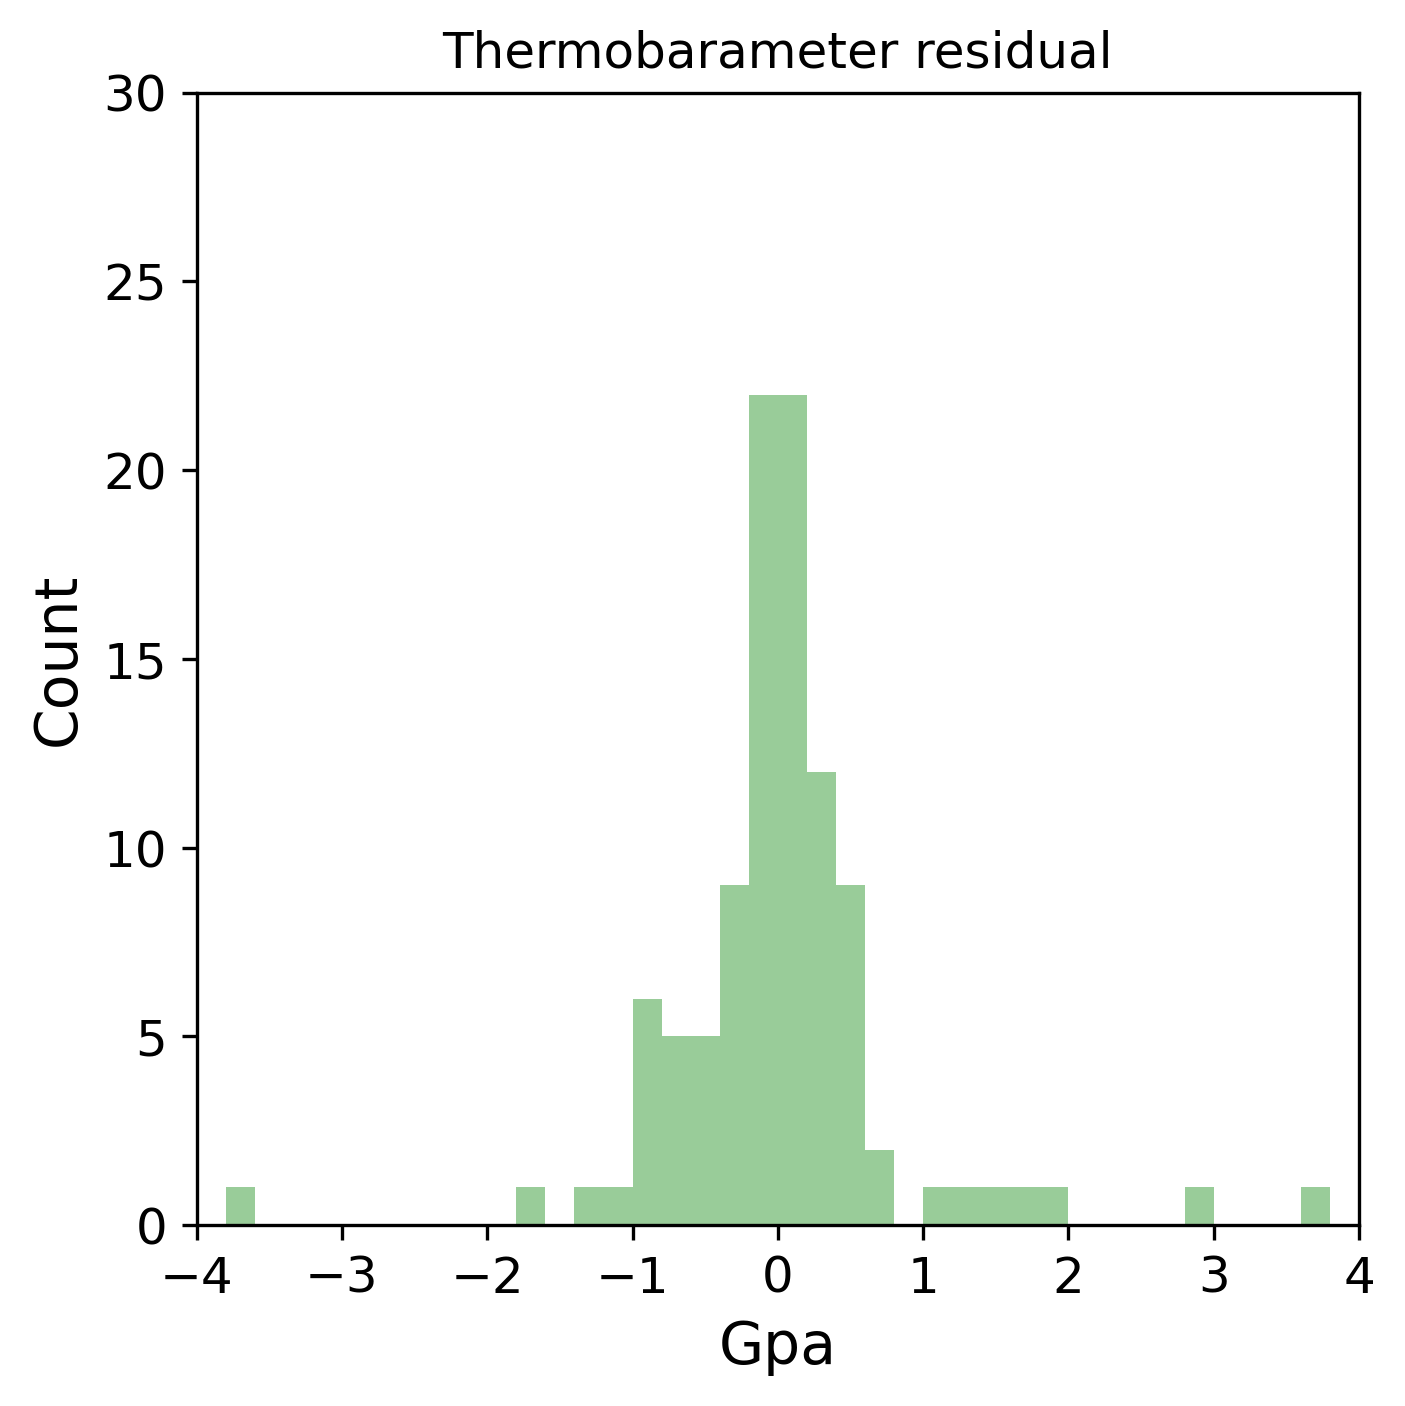

In [18]:
# 投分布图
import seaborn as sns
plt.figure(figsize=(5,5),dpi=300)

ax1 = plt.subplot(111)
ax1 = sns.distplot(a, bins = np.arange(-5,5,0.2), kde = False, hist_kws = {'color':'green'})
ax1.set_xlim((-4,4))
ax1.set_xticks([-4,-3,-2,-1,0,1,2,3,4])
ax1.set_ylim((0,30))
#plt.legend()
ax1.set_ylabel('Count')
ax1.set_xlabel('Gpa')

plt.subplots_adjust(wspace=0, hspace=0)
plt.title("Thermobarameter residual")
plt.show()

In [19]:
plt.figure(figsize = (9,9),dpi=900)

#p1 = max(max(y_test_pred_xgb),max(y_test))
#p2 = min(min(y_test_pred_xgb),min(y_test))
plt.plot()
plt.xlabel('Predicted Values (GPa)', fontsize =20)
plt.ylabel('True  Values (GPa)', fontsize =20)


plt.xlim((0, 12))
plt.ylim((0, 12))

plt.scatter(y_pred_xgb,y_train,marker='^',facecolors='none', edgecolors='darkorange', s=150,label=r'R2(train)={}'.format(Train_r2))
#plt.scatter(y_train,y_pred_xgb,marker='o',alpha=0 ,label=r'$RMSE(train)=${}'.format(Train_rmse))
plt.scatter(y_test_pred_xgb,y_test,marker='o', s=70,label=r'R2(test)={}'.format(Test_r2))
plt.scatter(y_pred_xgb,y_train,marker='o',alpha=0 ,label=r'RMSE(train)={}'.format(Train_rmse))
plt.plot((0, 12), (0, 12), ls='-',c='k') #, label="y = x"
plt.plot((0, 12), (-1, 11), ls='--', c='gray') #, label="y = x ± 1"
plt.plot((0, 12), (1, 13), ls='--', c='gray')

# plt.plot((0, 12), (0, 12), ls='-',c='k') #, label="y = x"
# plt.plot((0, 12), (-1, 11), ls='--', c='gray') #, label="y = x ± 1"
# plt.plot((0, 12), (1, 13), ls='--', c='gray')

plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.tick_params(axis='both', which='both', length=8)
plt.legend(loc='upper left',frameon=False, fontsize=17)   #(-0.02, 0.80)
plt.title("CPXOPX barameter", fontsize=20)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

In [22]:
#predict the non label data
predict_data = pd.read_excel ('global预测.xlsx',sheet_name='Sheet1')  

#process = preprocessing.StandardScaler()
x_predict_data = predict_data # process.fit_transform(predict_data)

In [23]:
predict_results = xgb_clf.predict(x_predict_data)

In [24]:
predict_results

array([5.3183794, 5.7957115, 5.463025 , ..., 1.8618567, 1.8454864,
       2.3917813], dtype=float32)

In [25]:
df = pd.DataFrame(data=predict_results)
df.to_excel('global预测P.xlsx')

In [59]:
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator
import numpy as np

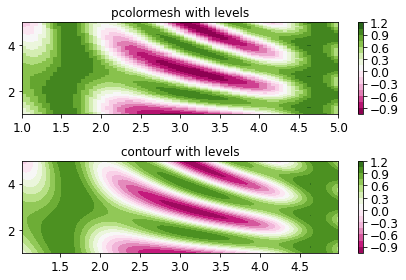

In [60]:
# make these smaller to increase the resolution
dx, dy = 0.05, 0.05

# generate 2 2d grids for the x & y bounds
y, x = np.mgrid[slice(1, 5 + dy, dy),
                slice(1, 5 + dx, dx)]

z = np.sin(x)**10 + np.cos(10 + y*x) * np.cos(x)

# x and y are bounds, so z should be the value *inside* those bounds.
# Therefore, remove the last value from the z array.
z = z[:-1, :-1]
levels = MaxNLocator(nbins=15).tick_values(z.min(), z.max())


# pick the desired colormap, sensible levels, and define a normalization
# instance which takes data values and translates those into levels.
cmap = plt.colormaps['PiYG']
norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)

fig, (ax0, ax1) = plt.subplots(nrows=2)

im = ax0.pcolormesh(x, y, z, cmap=cmap, norm=norm)
fig.colorbar(im, ax=ax0)
ax0.set_title('pcolormesh with levels')


# contours are *point* based plots, so convert our bound into point
# centers
cf = ax1.contourf(x[:-1, :-1] + dx/2.,
                  y[:-1, :-1] + dy/2., z, levels=levels,
                  cmap=cmap)
fig.colorbar(cf, ax=ax1)
ax1.set_title('contourf with levels')

# adjust spacing between subplots so `ax1` title and `ax0` tick labels
# don't overlap
fig.tight_layout()

plt.show()

In [507]:
from sklearn.model_selection import cross_val_score

# Ten-fold cross validation      neg_mean_absolute_error  neg_mean_absolute_error
scores = cross_val_score(xgb_clf, X_train, y_train,
                        scoring = "r2", cv=5,
                        n_jobs=8)
def display_scores(scores):

    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
    
display_scores(scores)

Scores: [0.83226422 0.59350655 0.71254936 0.73785545 0.70338105]
Mean: 0.7159113274342662
Standard deviation: 0.07638164718442145


In [27]:
xgb_clf.feature_importances_

array([0.41578302, 0.07927613, 0.10997638, 0.06005265, 0.03832504,
       0.11588194, 0.05632875, 0.03358474, 0.09079136], dtype=float32)

In [14]:
# show feature importance
for feature_name, score in zip(list(X.columns), xgb_clf.feature_importances_):
    print(feature_name, ":", score)

AttributeError: 'MultiOutputRegressor' object has no attribute 'feature_importances_'

In [117]:
learning_rate = [ 0.1, 0.2, 0.5,0.6,0.7]
depth = [3, 4, 5, 6, 7]
min_split = [0.1,0.2,0.5, 1, 2, 3]
alpha1 = [0.1,0.3,0.5,0.7,0.9, 1]
#colsample_bytree= [0.5,0.6,0.7,0.8,0.9,1]
#n_estimiter = [100,200,300,500,800,1000]  
#weight gain cover #,n_estimators=1000

In [118]:
xgb = XGBRegressor(objective='reg:squarederror',
                     tree_method='hist', seed=2021,importance_type = 'cover')#eval_metric = 'r2',

In [119]:
xgb_cv = GridSearchCV(xgb, param_grid = {'eta': learning_rate, 'gamma': min_split, 'max_depth': depth, 'alpha':alpha1}, 
                      cv=5,scoring='r2') 
xgb_cv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    gamma=None, gpu_id=None, grow_policy=None,
                                    importance_type='cover',
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None, ...),
             param_grid={'alpha': [0.1, 0.3, 0.5, 0.7, 0.9, 1],
                         'eta': [0.1, 0.2, 0.5, 0.6, 0.7],
                         'gamma': [0.1, 0.2, 0.5, 1, 2, 3],
                         'max_depth': [3, 4, 5, 6, 7]},
             scoring='r2')

In [120]:
#xgb_cv.best_params_

In [121]:
xgb_cv.best_score_

0.7285783236562173

In [122]:
xgb_cv.best_estimator_

XGBRegressor(alpha=0.1, base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False, eta=0.1,
             eval_metric=None, gamma=0.1, gpu_id=-1, grow_policy='depthwise',
             importance_type='cover', interaction_constraints='',
             learning_rate=0.100000001, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=2021, ...)

In [75]:
features = list(X.columns)
importances = xgb_cv.best_estimator_.feature_importances_
indices = np.argsort(importances)

NameError: name 'X' is not defined

In [76]:
df4 = pd.DataFrame({'features':features,'importances':importances})
#df4.to_excel('fig5-trace.xlsx')

NameError: name 'features' is not defined

In [77]:
plt.barh(range(len(indices)), importances[indices], color='c', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices], fontsize=20)
plt.xticks(fontsize=20)
plt.xlabel('Relative Importance',fontsize=25)
plt.savefig('Major1 Feature.png', dpi=900)
plt.show()
plt.rcParams["figure.figsize"] = (20, 10)


NameError: name 'indices' is not defined

In [78]:
from sklearn.model_selection import cross_val_score

# ten-fold cross validation
scores = cross_val_score(xgb_cv.best_estimator_, X_train, y_train,
                        scoring = "r2", cv=10,
                        n_jobs=-1)
def display_scores(scores):
    
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
    
display_scores(scores)

Scores: [0.60825785 0.76123106 0.62218042 0.69261624 0.50635323 0.60426776
 0.56306908 0.49554745 0.81120326 0.79785815]
Mean: 0.6462584498524484
Standard deviation: 0.10888148066238879


In [22]:
# predict the test data set
xgb_test = xgb_cv.best_estimator_
xgb_test.fit(X_train,y_train)
y_test_pred = xgb_test.predict(X_test)

In [23]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

test_rmse = np.around(np.sqrt(mean_squared_error(y_test, y_test_pred)), decimals=3)
train_r2 = np.around(r2_score(y_test, y_test_pred), decimals=3)
test_r2 = np.around(r2_score(y_test, y_test_pred), decimals=3)



print("TEST RMSE = ",test_rmse)

print("TEST R2 =",test_r2)

TEST RMSE =  12.334
TEST R2 = 0.734


0.0

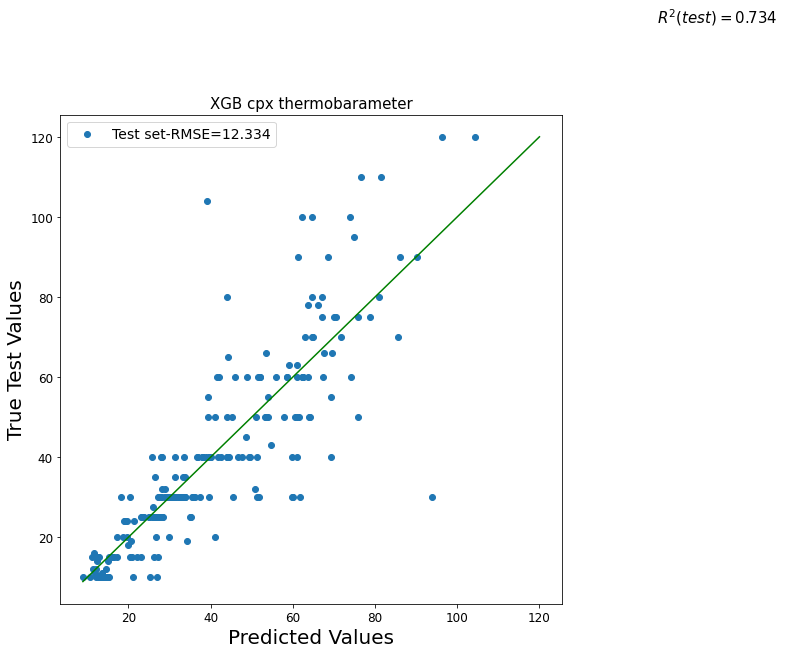

In [24]:
plt.figure(figsize = (9,9))

p1 = max(max(y_test_pred),max(y_test))
p2 = min(min(y_test_pred),min(y_test))
plt.plot([p1,p2],[p1,p2],'green')
plt.xlabel('Predicted Values', fontsize =20)
plt.ylabel('True Test Values', fontsize =20)

plt.scatter(y_test_pred,y_test,marker='o',label="Test set-RMSE={}".format(test_rmse))


plt.legend(loc='upper left', fontsize=14)

text_position = [150, 150]
#plt.text(text_position[0]-2.3, text_position[1]-1.2,
#             r'$R^2(train)=${}'.format(train_r2),
#             fontdict={'size': 15, 'color': '#000000'})
plt.text(text_position[1]-1.3, text_position[0]-1.5,
             r'$R^2(test)=${}'.format(test_r2),
             fontdict={'size': 15, 'color': '#000000'})
 
plt.title("XGB cpx thermobarameter", fontsize=15)
plt.show

cha = train_r2 - test_r2
cha


In [86]:
#predict the non label data
predict_data = pd.read_excel ('C:\\Users\\lenovo\\Desktop\\Trainingset\\预测数据\\MAJOR.xlsx')

#process = preprocessing.StandardScaler()
x_predict_data = predict_data # process.fit_transform(predict_data)

In [ ]:
predict_results = xgb_cv.best_estimator_.predict_proba(x_predict_data)

In [ ]:
predict_results

In [ ]:
df = pd.DataFrame(data=predict_results)
df.to_excel('predict_resultsMAJOR2.xlsx')

In [ ]:
###Xgboost end